In [201]:
import pandas as pd 
from pandas import DataFrame
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split


In [203]:
titanic_train_data = pd.read_csv("/home/kapil/Downloads/0000000000002429_training_titanic_x_y_train (1).csv")
titanic_train_data.head(20)



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
5,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,0
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S,0
8,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
9,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S,0


In [243]:
titanic_train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,667.000000,667.000000,667.000000,667.000000,667.000000
mean,2.298351,29.083208,0.529235,0.407796,31.992684
std,0.830742,13.003486,1.080943,0.855190,45.316739
min,1.000000,0.670000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.925000
50%,3.000000,27.000000,0.000000,0.000000,14.500000
75%,3.000000,37.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
titanic_train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,668,668,668,154,667
unique,668,2,524,119,3
top,"Silvey, Mr. William Baird",male,3101295,G6,S
freq,1,427,6,4,484


In [206]:
print(titanic_train_data.columns.values)

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked' 'Survived']


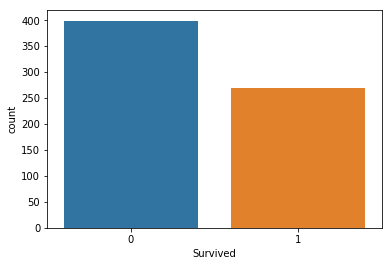

In [207]:
sb.countplot(x="Survived", data = titanic_train_data)

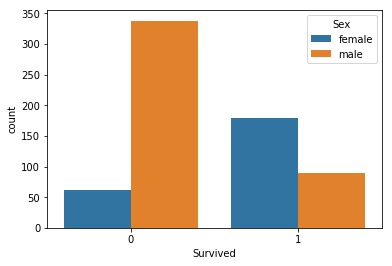

In [208]:
sb.countplot(x="Survived",hue="Sex", data = titanic_train_data)

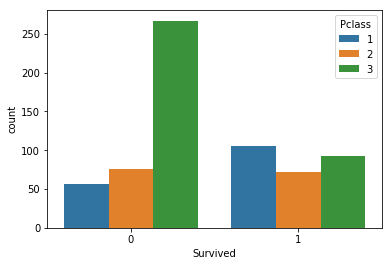

In [209]:
sb.countplot(x="Survived",hue="Pclass", data = titanic_train_data)

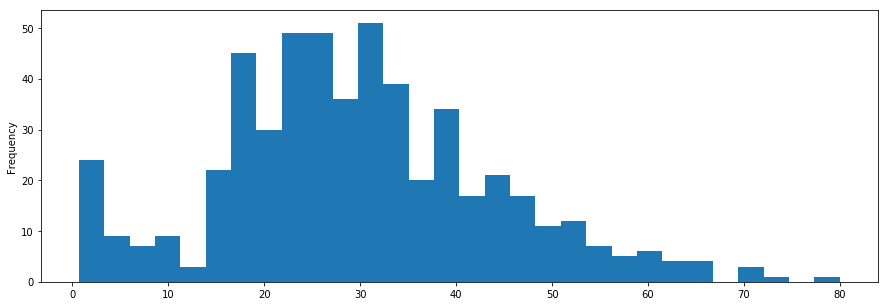

In [210]:
titanic_train_data["Age"].plot.hist(bins=30,figsize=(15,5))

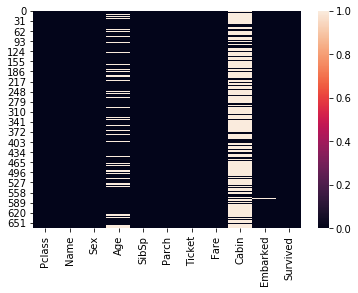

In [211]:
sb.heatmap(titanic_train_data.isnull() )

In [212]:
titanic_train_data=titanic_train_data.drop(["Name","Ticket","Cabin"], 1)

In [213]:
titanic_train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,29.0,1,0,26.000,S,1
1,3,male,NaN,0,0,8.050,S,0
2,2,male,39.0,0,0,26.000,S,0
3,3,female,29.0,0,4,21.075,S,0
4,3,male,25.0,0,0,7.050,S,0


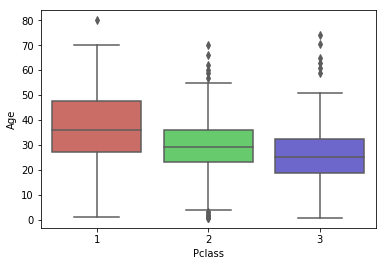

In [214]:
sb.boxplot(x="Pclass",y="Age" ,data = titanic_train_data ,palette="hls")

In [215]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [216]:
titanic_train_data['Age'] = titanic_train_data[['Age' , 'Pclass']].apply(age_approx,axis=1)

In [217]:
titanic_train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
Survived    0
dtype: int64

In [218]:
titanic_train_data.dropna(inplace=True)
titanic_train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [219]:
gender = pd.get_dummies(titanic_train_data['Sex'],drop_first=True)
gender.head()

,male
0,0
1,1
2,1
3,0
4,1


In [220]:
embark_location=pd.get_dummies(titanic_train_data['Embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [221]:
titanic_train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,29.0,1,0,26.000,S,1
1,3,male,24.0,0,0,8.050,S,0
2,2,male,39.0,0,0,26.000,S,0
3,3,female,29.0,0,4,21.075,S,0
4,3,male,25.0,0,0,7.050,S,0


In [222]:
titanic_train_data.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_train_data.head()


,Pclass,Age,SibSp,Parch,Fare,Survived
0,2,29.0,1,0,26.000,1
1,3,24.0,0,0,8.050,0
2,2,39.0,0,0,26.000,0
3,3,29.0,0,4,21.075,0
4,3,25.0,0,0,7.050,0


In [223]:
Y_train = titanic_train_data['Survived']

titanic_train_data.drop(['Survived'], axis=1, inplace = True)
X_train = pd.concat([titanic_train_data ,gender,embark_location],axis=1)

In [224]:


X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,29.0,1,0,26.000,0,0,1
1,3,24.0,0,0,8.050,1,0,1
2,2,39.0,0,0,26.000,1,0,1
3,3,29.0,0,4,21.075,0,0,1
4,3,25.0,0,0,7.050,1,0,1


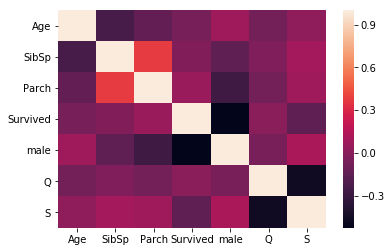

In [225]:
sb.heatmap(titanic_day.corr())

In [228]:
titanic_test_data = pd.read_csv("/home/kapil/Downloads/0000000000002429_test_titanic_x_test.csv")
titanic_test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [229]:
titanic_test_data.shape

(223, 10)

In [230]:
print(titanic_test_data.columns.values)

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked']


In [231]:
titanic_test_data=titanic_test_data.drop(["Name","Ticket","Cabin"], 1)
titanic_test_data['Age'] = titanic_test_data[['Age' , 'Pclass']].apply(age_approx,axis=1)
titanic_train_data.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [232]:
gender = pd.get_dummies(titanic_test_data['Sex'],drop_first=True)
embark_location=pd.get_dummies(titanic_test_data['Embarked'],drop_first=True)

In [233]:
titanic_test_data.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_test_data.head()

,Pclass,Age,SibSp,Parch,Fare
0,2,8.0,1,1,36.7500
1,1,49.0,0,0,25.9292
2,3,24.0,0,0,7.7375
3,2,24.0,2,1,27.0000
4,1,36.0,0,0,26.2875


In [234]:
X_test = pd.concat([titanic_test_data ,gender,embark_location],axis=1)

In [235]:
X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2.345291,28.976099,0.506726,0.304933,32.622551,0.672646,0.121076,0.717489
std,0.850047,13.986078,1.169700,0.634108,61.062047,0.470303,0.326950,0.451234
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.879200,0.000000,0.000000,0.000000
50%,3.000000,24.000000,0.000000,0.000000,12.475000,1.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,30.035400,1.000000,0.000000,1.000000
max,3.000000,71.000000,8.000000,2.000000,512.329200,1.000000,1.000000,1.000000


In [236]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,2.298351,29.083208,0.529235,0.407796,31.992684,0.640180,0.074963,0.725637
std,0.830742,13.003486,1.080943,0.855190,45.316739,0.480308,0.263528,0.446527
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.500000,1.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [237]:
Y = np.reshape(np.array(Y), (667,1))

NameError: name 'Y' is not defined

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
logmodel = LogisticRegression()

In [240]:
logmodel.fit(X_train,Y_train)

/home/kapil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [241]:
Y_pred = logmodel.predict(X_test)

In [242]:
np.savetxt('result1.csv',Y_pred, delimiter=',')